# Height vs Weight

Welcome to Core Workshop 4: Polynomial Regression's live code session

Today we are dealing with a csv toy dataset taken from Kaggle: [https://www.kaggle.com/sakshamjn/heightvsweight-for-linear-polynomial-regression](https://www.kaggle.com/sakshamjn/heightvsweight-for-linear-polynomial-regression), which records the **weight** and **height** of people (they are made up). The data is already cleaned.

---

#### In this session we are using this data to build a `linear regression` model, trying to predict the **height** by a given **weight**

# Explore

In [1]:
# Let's firstly try to look how the dataset look like

import pandas as pd

df = pd.read_csv("./data/HeightVsWeight.csv")
df


,Weight,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


Text(0.5, 1.0, 'Height VS Weight')

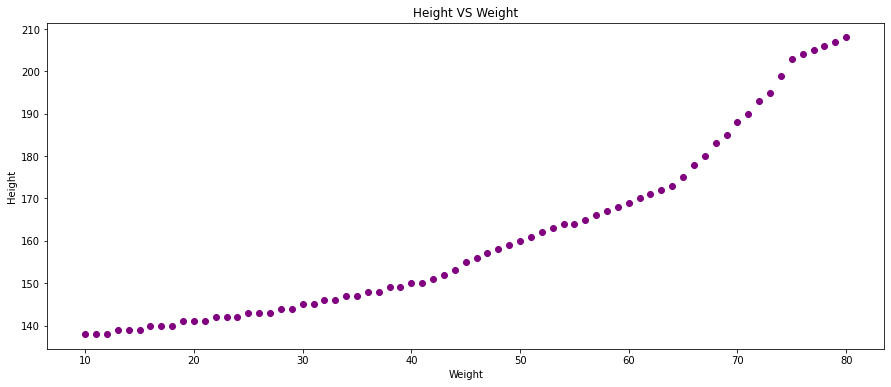

In [2]:
# We can see that there are 71 points consisting of Weight and Height variable
# Then let's try to visualize these data points in a plot
import matplotlib.pyplot as plt

# Extract the columns into x and y variable
x = df.iloc[:, :1]
y = df.iloc[:, 1:]

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="purple")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height VS Weight")

# Split

In [3]:
# Before building our model, we sould split the data into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=404)
print("Train data size: {}".format(len(x_train)))
print("Test data size: {}".format(len(x_test)))
x_train.head()

Train data size: 56
Test data size: 15


,Weight
40,50
7,17
25,35
43,53
31,41


# Training

In [4]:
# Now, hands on to build a linear regression model. One of the quickest way is to use the one provided sklearn library

from sklearn.linear_model import LinearRegression
import random
import numpy as np

model = LinearRegression()
model.fit(x_train, y_train)

print("Model training completed")
rand = np.array([[random.randint(10, 80)]])
print("Trying to predict a person with a weight of {} kg will have a height of {} cm".format(rand[0][0], round(model.predict(rand)[0][0], 2)))

Model training completed
Trying to predict a person with a weight of 35 kg will have a height of 151.69 cm


Text(0.5, 1.0, 'Height VS Weight')

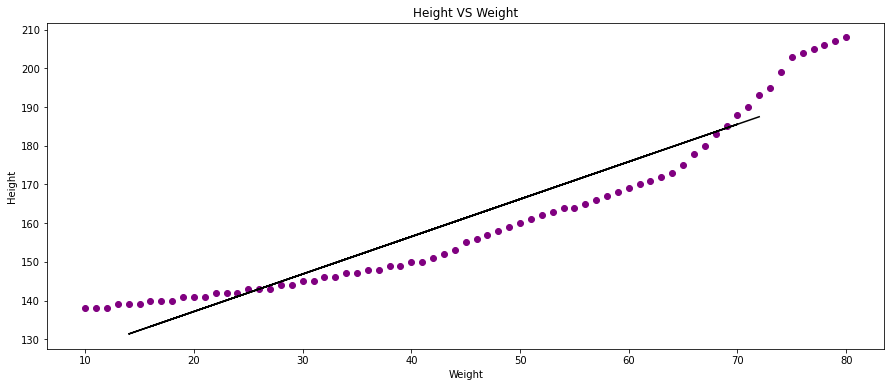

In [5]:
# Let's see how is the line built from our training data

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="purple")
plt.plot(x_test, model.predict(x_test), color="black")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height VS Weight")


## As we can see, the line doesn't fit very well...

# Score

In [6]:
accuracy_score = model.score(x_test, y_test)
print("Model Accuracy: {}".format(round(accuracy_score, 4)))

Model Accuracy: 0.8843


# This is a pretty good accuracy score, but can we do it better?